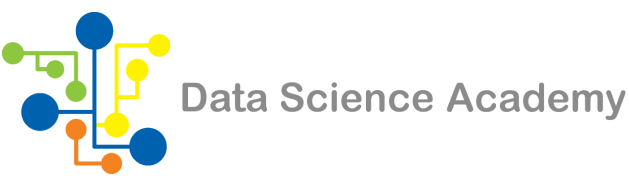


# Projeto com Feedback 
### Prevendo o Nível de Satisfação dos Clientes do Santander

A satisfação do cliente é uma medida fundamental de sucesso. Clientes insatisfeitos cancelam seus serviços e raramente expressam sua insatisfação antes de sair. Clientes satisfeitos, por outro lado, se tornam defensores da marca!

O Banco Santander está pedindo para ajudá-los a identificar clientes insatisfeitos no início do relacionamento. Isso permitiria que o Santander adotasse medidas proativas para melhorar a felicidade de um cliente antes que seja tarde 
demais.

Neste projeto de aprendizado de máquina, você trabalhará com centenas de recursos anônimos para prever se um cliente está satisfeito ou insatisfeito com sua experiência bancária.

Defina claramente o problema de negócio, faça a coleta e preparo dos dados, escolha um algoritmo, treine o modelo e avalie a acurácia, que deve ser de pelo menos 70%.

Conheça a DSA

https://www.datascienceacademy.com.br/start

# Prevendo o Nível de Satisfação dos Clientes do Santander

Descrição do processo 

PASSO 1

A - Carregar os dados

B - Tratamento dos dados

C - Realizar a analise exploratoria das váriaveis para compreender os dados estão distribuidos

D - Feature Selection (Escolha das variáveis mais relevantes para serem utilizadas no modelo)

E - Padronização das Variaveis

F - Balanceamento dos dados - Caso exista mais dados de uma classificação

PASSO 2

A - SPLIT do dataset treino/teste com divisão 70% por 30%

B - Escolhado dos Modelos a ser utilizado

C - Cross-Validation

D - Confusion Matriz (originais VS previstos)

E - Otimização do modelo (ajuste dos parametros)


PASSO 3

A - Tratamento dos dados 

B - Predict - previsão dos dados 

C - Exibição dos dados finais

# Descrições das Variáveis

Descrição das variáveis

Dados:
    
1."state", string. código alfabético do estado de residência do cliente nos EUA

2."account_length", numerical. Número de meses que o cliente está com o
provedor de telecomunicações atual

3."area_code", string="area_code_AAA" where AAA = 3 dígito do código de área.

4."international_plan", (yes/no). O cliente possui plano internacional.

5."voice_mail_plan", (yes/no). O cliente possui plano de correio de voz.

6."number_vmail_messages", numerical. Número de mensagens de correio de voz.

7."total_day_minutes", numerical. Total de minutos de chamadas diárias.

8."total_day_calls", numerical. Total de minutos de chamadas diárias.

9."total_day_charge", numerical. Cobrança total das chamadas diurnas.

10."total_eve_minutes", numerical. Total de minutos de ligações noturnas.

11."total_eve_calls", numerical. Número total de ligações noturnas.

12."total_eve_charge", numerical. Cobrança total das chamadas noturnas.

13."total_night_minutes", numerical. Total de minutos de chamadas noturnas.

14."total_night_calls", numerical. Número total de chamadas noturnas.

15."total_night_charge", numerical. Cobrança total das chamadas noturnas.

16."total_intl_minutes", numerical. Total de minutos de chamadas internacionais.

17."total_intl_calls", numerical. Número total de chamadas internacionais.

18."total_intl_charge", numerical. Custo total de chamadas internacionais.

19."number_customer_service_calls", numerical. Número de ligações para atendimento ao cliente.

20."churn", (yes/no). Customer churn - target variable.

# Inicio
Importação dos pacotes e bibliotecas

In [1]:
# Biblioteca para manipulação de Dados
import pandas as pd

# Biblioteca para plotar os gráficos
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Biblioteca para operação matemáticas de matrizes e arrays
import numpy as np

# Biblioteca para filtrar warnings e não apresentar na tela
import warnings
warnings.filterwarnings("ignore")

# Biblioteca utilizada durante as operações de Feature Selection e Treinamento do Modelo
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Biblioteca utilizada durante a padronização dos dados
from sklearn.preprocessing import StandardScaler

# Biblioteca utilizada para realizar o balanceamento dos dados
#instalação do pacote caso não exista
#!pip install imblearn 
from imblearn.over_sampling import SMOTE

# Bibilioteca utilizada durante o split dos dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca utilizada para avaliação do modelo criado
from sklearn import metrics

# Biblioteca utilizada para realizar o cross-validation com os dados teste
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Biblioteca utilizada para otimização de hyper-parametros
from sklearn.model_selection import GridSearchCV

In [2]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Marcos Bruno Mendes" --iversions

Author: Marcos Bruno Mendes

matplotlib: 3.4.3
pandas    : 1.2.2
sklearn   : 1.2.0
seaborn   : 0.11.2
numpy     : 1.20.1



# Passo 1
Obtenção e tratamento dos dados

## A - Carregar os Dados

In [4]:
#Carregando os Datasets
df_train = pd.read_csv('projeto4_telecom_treino.csv')
df_test = pd.read_csv('projeto4_telecom_teste.csv')

In [5]:
#Verificando tipo
print(type(df_test), type(df_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [6]:
#Imprimindo 15 primeiros registros
pd.set_option('display.max_columns', None)#imprprime se max_cols for excedido, alterne para a visualização truncada
pd.set_option('display.expand_frame_repr', False )#imprimi df largos em varia linhas
pd.set_option('max_colwidth', -1)#Quando a coluna transborda, um marcador “…”
df_train.head(15)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [7]:
#Visualizando as informações do dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3333 non-null   int64  
 1   state                          3333 non-null   object 
 2   account_length                 3333 non-null   int64  
 3   area_code                      3333 non-null   object 
 4   international_plan             3333 non-null   object 
 5   voice_mail_plan                3333 non-null   object 
 6   number_vmail_messages          3333 non-null   int64  
 7   total_day_minutes              3333 non-null   float64
 8   total_day_calls                3333 non-null   int64  
 9   total_day_charge               3333 non-null   float64
 10  total_eve_minutes              3333 non-null   float64
 11  total_eve_calls                3333 non-null   int64  
 12  total_eve_charge               3333 non-null   f

*Com base nos dados observados é possível notar que algumas variáveis podem ter seu tipo transformado de "object" variáveis numéricas.

## B - Tratamento de dados

In [8]:
# Removendo a coluna [Unnamed: 0] que está caracterizando a sequência de registros do Dataset.
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
# Verificando os valores distintos de cada coluna do dataset
for i in df_train.columns:
    x = df_train[i].unique()
    print(x)


['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5  

In [10]:
# Conte observações distintas sobre o eixo solicitado de cada coluna do dataset
for i in df_train.columns:
    x = df_train[i].nunique()
    print(x)

51
212
3
2
2
46
1667
119
1667
1611
123
1440
1591
120
933
162
21
162
10
2


In [11]:
#Exibe os valores distintos da coluna state
df_train['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
# Função que será utilizada para transforma algumas variáveis string em Numéricas através de um mapeamento de dict.
def transformColumns(dataset):
    
    # Transforma as strings de valores Yes/No em 1/0 e atribui em um nvo campo, exceto a variável target Churn
    dictmapYesNo = {"yes": 1, "no": 0}
    
    dataset['international_plan_num'] = dataset['international_plan'].map(dictmapYesNo)
    dataset['voice_mail_plan_num'] = dataset['voice_mail_plan'].map(dictmapYesNo)    
    dataset['churn'] = dataset['churn'].map(dictmapYesNo)
        
    # Remove as strings dos códigos de Area, preservando somente o código em um novo campo
    dictmapAreaCode = {"area_code_415": 0, "area_code_408": 1, "area_code_510": 2}

    dataset['area_code_num'] = dataset['area_code'].map(dictmapAreaCode)
    
    #Transforma o valor da coluna State em valor numerico aleatorio apartir 1000
    dictmapState = {'KS': 1000, 'OH': 1001, 'NJ': 1002, 'OK': 1003, 'AL': 1004, 'MA': 1005, 
                    'MO': 1006, 'LA': 1007, 'WV': 1008, 'IN': 1009, 'RI': 1010, 
                    'IA': 1011, 'MT': 1012, 'NY': 1013, 'ID': 1014, 'VT': 1015, 
                    'VA': 1016, 'TX': 1017, 'FL': 1018, 'CO': 1019, 'AZ': 1020, 
                    'SC': 1021, 'NE': 1022, 'WY': 1023, 'HI': 1024, 'IL': 1025, 
                    'NH': 1026, 'GA': 1027, 'AK': 1028, 'MD': 1029, 'AR': 1030, 
                    'WI': 1031, 'OR': 1032, 'MI': 1033, 'DE': 1034, 'UT': 1035, 
                    'CA': 1036, 'MN': 1037, 'SD': 1038, 'NC': 1039, 'WA': 1040, 
                    'NM': 1041, 'NV': 1042, 'DC': 1043, 'KY': 1044, 'ME': 1045, 
                    'MS': 1046, 'TN': 1047, 'PA': 1048, 'CT': 1049, 'ND': 1050
                   }
    
    dataset['state_num'] = dataset['state'].map(dictmapState)
  

    # Transforma as variáveis que eram strings em Dados Categóricas
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    dataset['international_plan'] = dataset['international_plan'].astype('category')
    dataset['voice_mail_plan']    = dataset['voice_mail_plan'].astype('category')    
    dataset['area_code']          = dataset['area_code'].astype('category')
    dataset['state']              = dataset['state'].astype('category')

    # Reordenando as colunas para que a coluna TARGET (churn) seja a última coluna do Dataframe
    dataset = dataset[[col for col in dataset if col not in ['churn']] + ['churn']]    
    
    return dataset


In [13]:
df_train = transformColumns(df_train)

In [14]:
#Verificando Tipo das colunas modificadas
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   category
 1   account_length                 3333 non-null   int64   
 2   area_code                      3333 non-null   category
 3   international_plan             3333 non-null   category
 4   voice_mail_plan                3333 non-null   category
 5   number_vmail_messages          3333 non-null   int64   
 6   total_day_minutes              3333 non-null   float64 
 7   total_day_calls                3333 non-null   int64   
 8   total_day_charge               3333 non-null   float64 
 9   total_eve_minutes              3333 non-null   float64 
 10  total_eve_calls                3333 non-null   int64   
 11  total_eve_charge               3333 non-null   float64 
 12  total_night_minutes            333

In [15]:
#visualizar o Dataframe
df_train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,1000,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,1001,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,1002,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,1,1001,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0,1003,0
5,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1,0,2,1004,0
6,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1,2,1005,0
7,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,1,0,0,1006,0
8,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,1,1007,0
9,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,1,1,0,1008,0


## C - Realizar a analise exploratoria das váriaveis para compreender os dados

In [16]:
#Sumário Estatístico
pd.set_option('display.max_columns', None)#imprprime se max_cols for excedido, alterne para a visualização truncada
pd.set_option('display.expand_frame_repr', False )#imprimi df largos em varia linhas
pd.set_option('max_colwidth', -1)#Quando a coluna transborda, um marcador “…”
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.096910,0.276628,0.755476,1024.269127,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.295879,0.447398,0.830054,14.736558,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,1012.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,1.000000,1024.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,1.000000,2.000000,1037.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,2.000000,1050.000000,1.000000


In [17]:
#Verificar valores nulos
df_train.isnull().values.any()

False

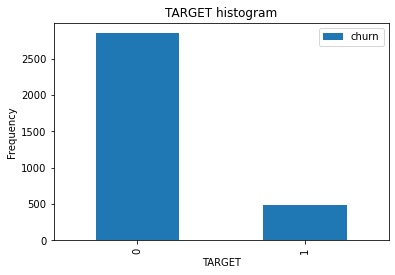

In [18]:
#Distribuição da classe TARGET
pd.value_counts(df_train['churn']).plot.bar()
plt.title('TARGET histogram')
plt.xlabel('TARGET')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('f.jpg')


In [19]:
#Verificando se a variável CHURN está balanceada
Count_No = len(df_train[df_train['churn']==0])
Count_Yes = len(df_train[df_train['churn']==1])

print ("Percentual de Clientes que Cancelaram: ", round((Count_Yes / (Count_Yes+Count_No))*100,6))
print ("Percentual de Clientes que Não Cancelaram: ", round((Count_No / (Count_Yes+Count_No))*100,6))

Percentual de Clientes que Cancelaram:  14.491449
Percentual de Clientes que Não Cancelaram:  85.508551


Como podemos notar os dados estão desbalanceados, usaremos técnicas  de balanceamento para que 
o modelo não fique tendencioso.

### Gerar histrogramas para melhor compreensão

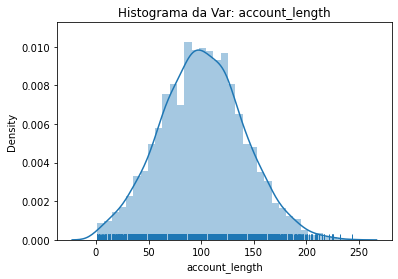

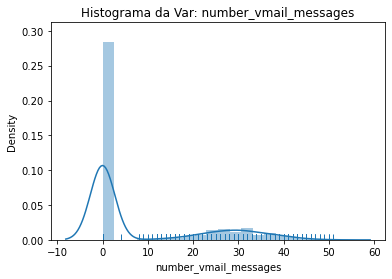

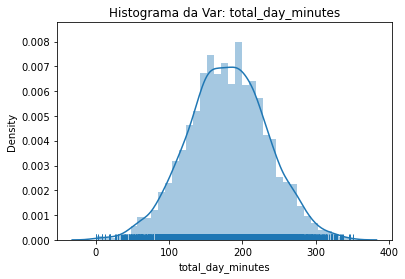

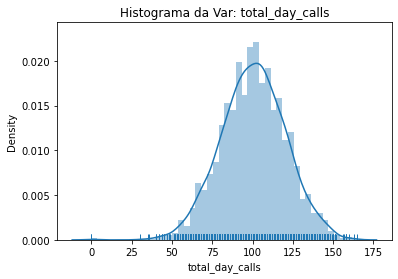

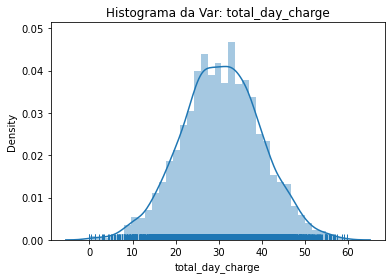

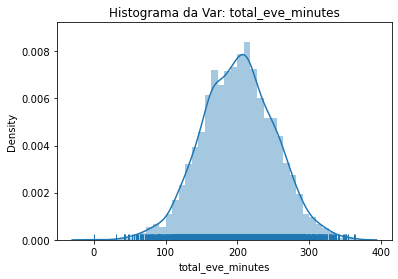

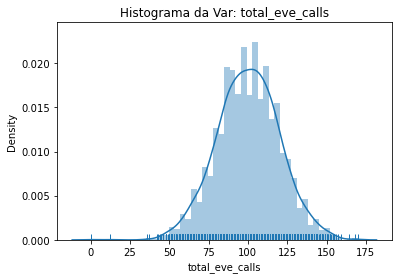

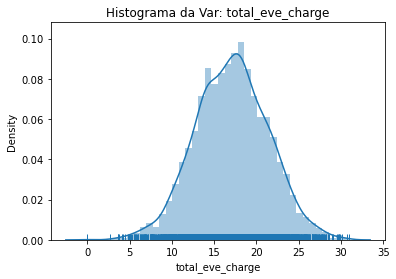

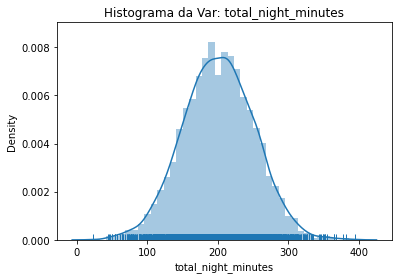

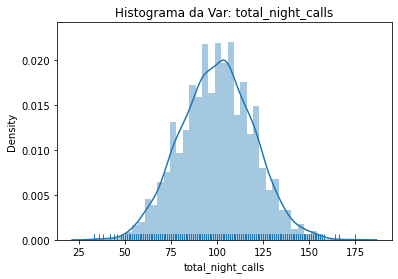

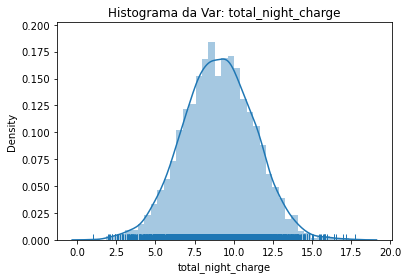

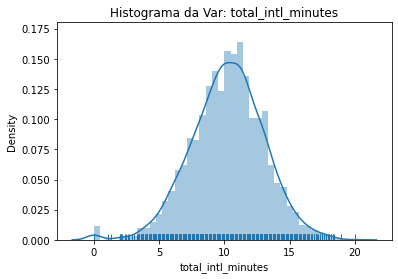

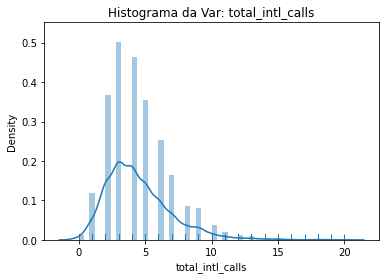

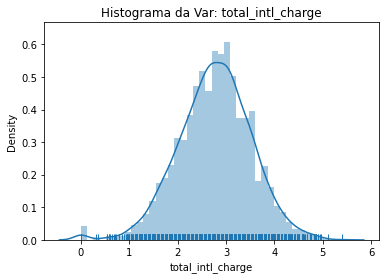

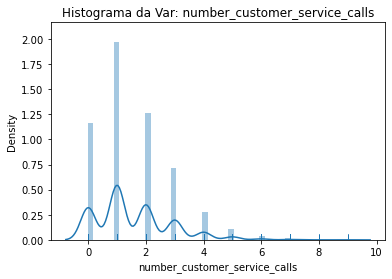

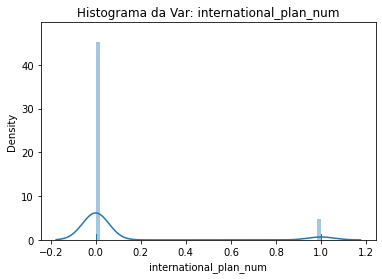

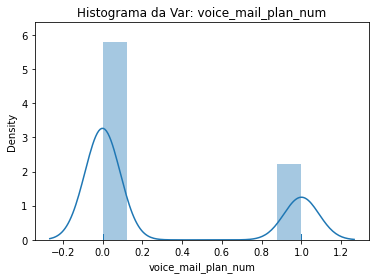

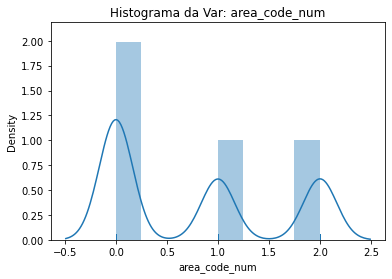

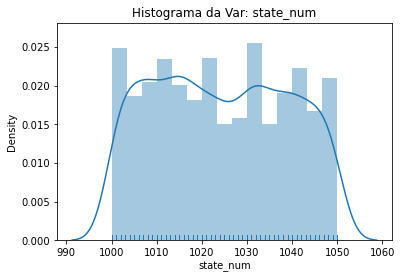

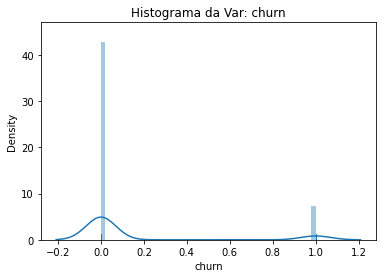

In [20]:
#Imprimindo histrogramas
columnsDf = df_train.select_dtypes(exclude='category').columns

#loop
for i in columnsDf:
    sns.distplot(df_train[i], rug=True)
    plt.title('Histograma da Var: ' + i)
    plt.xlabel(i)
    plt.show()

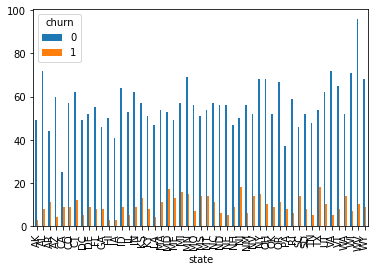

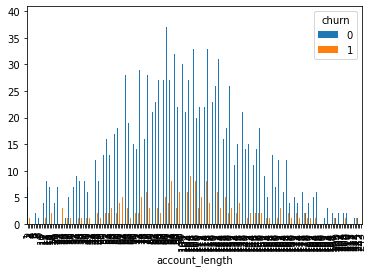

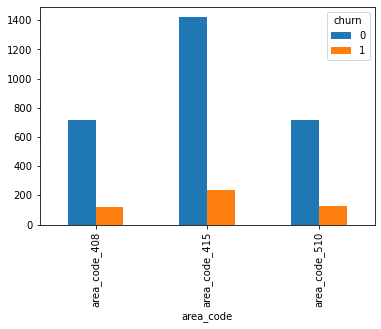

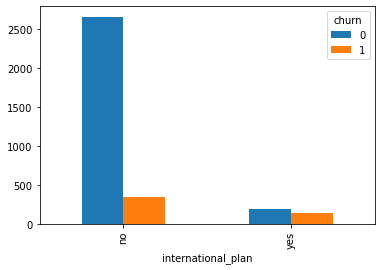

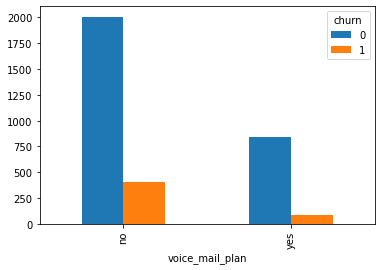

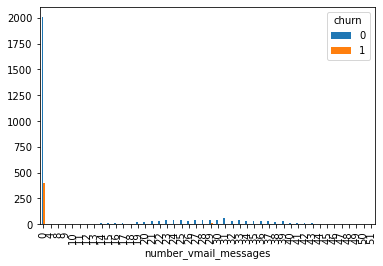

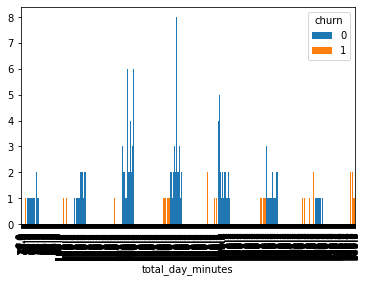

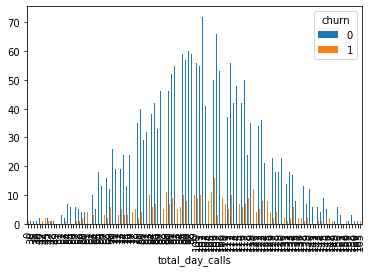

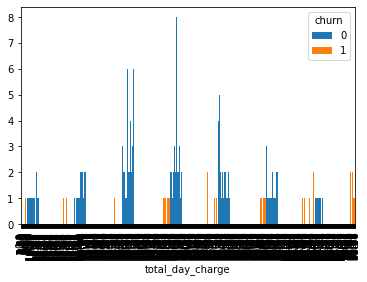

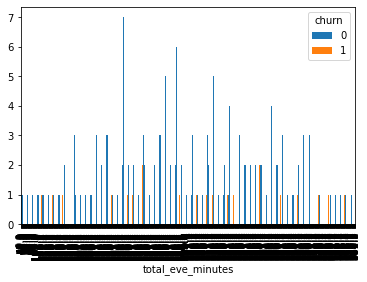

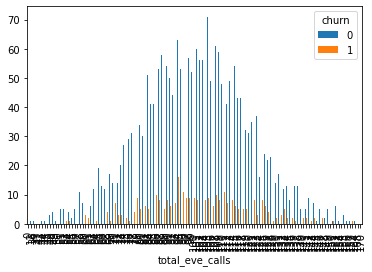

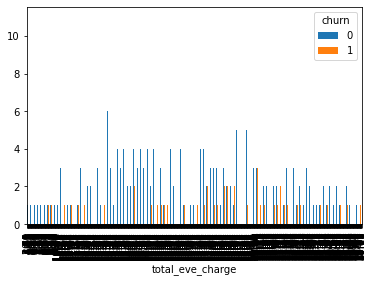

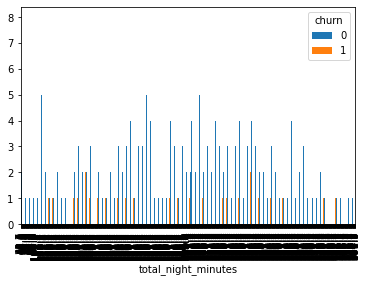

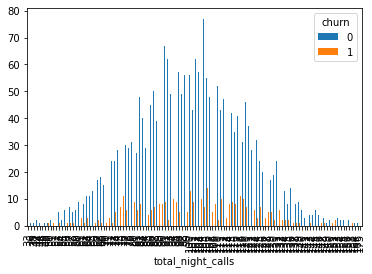

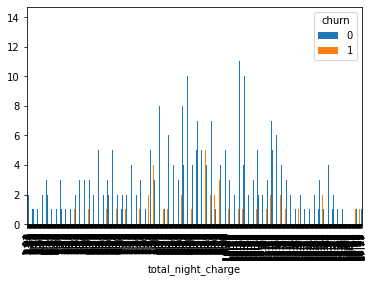

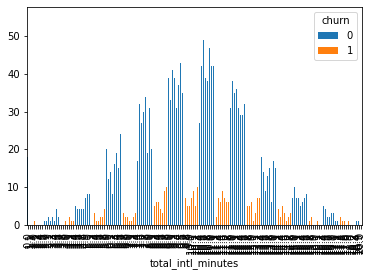

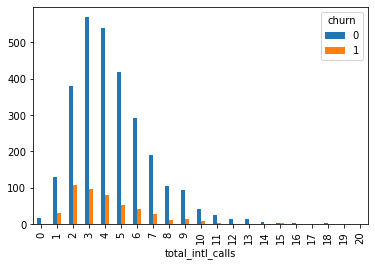

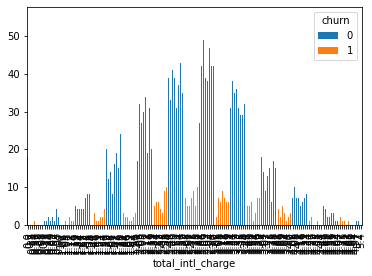

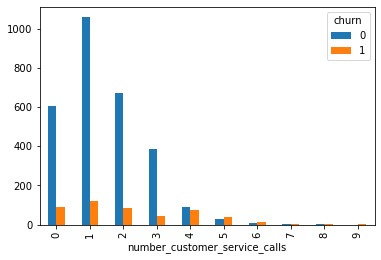

In [21]:
# Verificando qual a correlação categórica em relação a variável TARGET'churn'
colunmsCorr = [col for col in df_train.columns if col not in ['international_plan_num','voice_mail_plan_num','area_code_num','state_num','churn']]

for i in colunmsCorr:
    pd.crosstab(df_train[i], df_train.churn).plot(kind='bar')

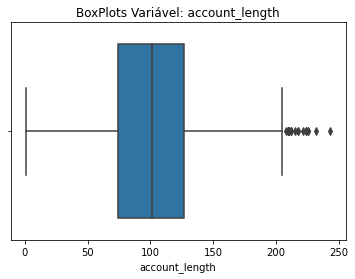

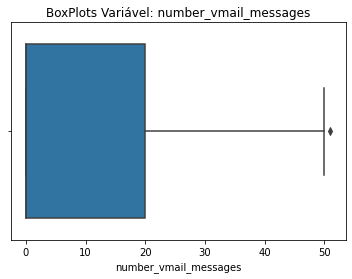

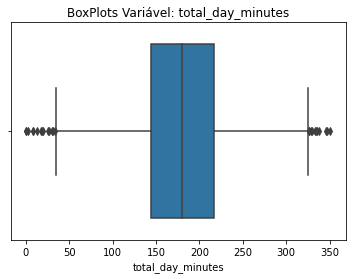

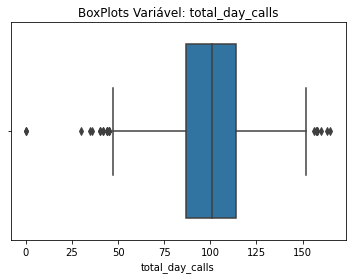

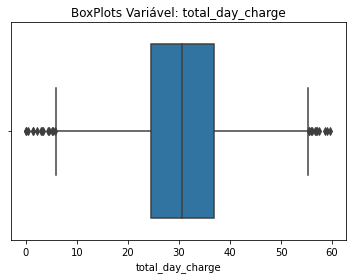

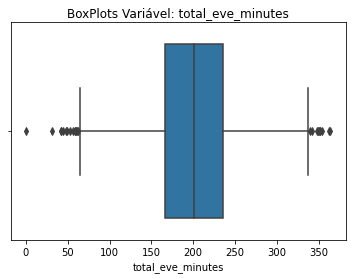

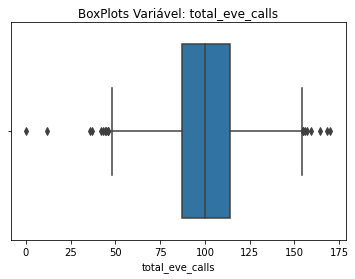

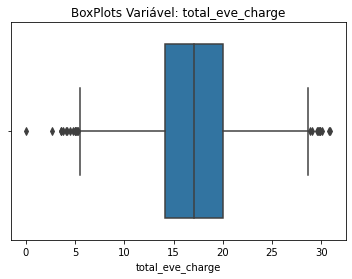

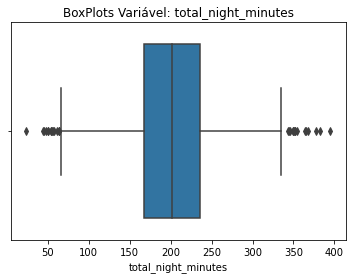

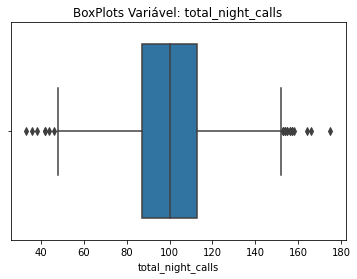

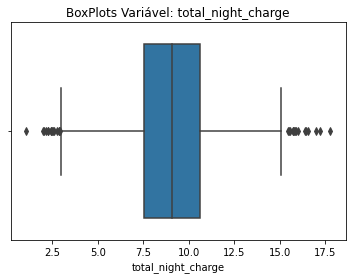

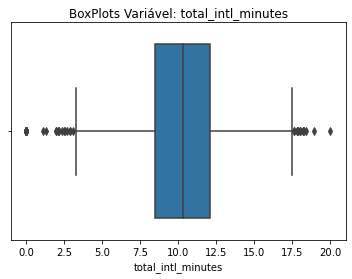

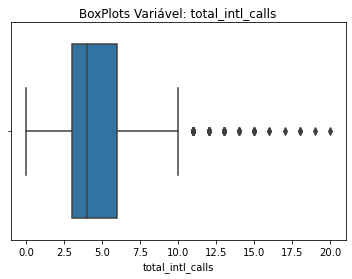

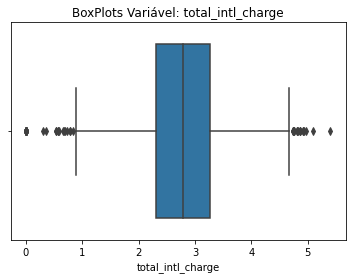

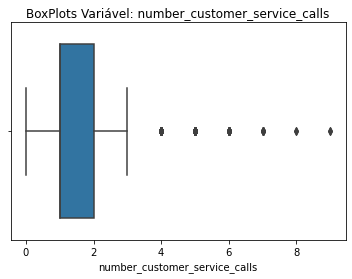

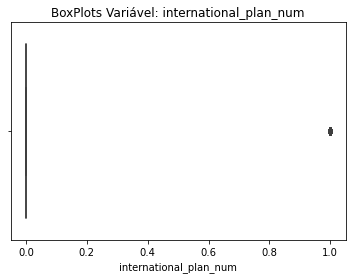

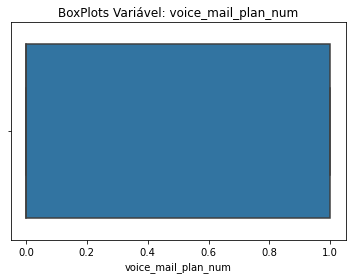

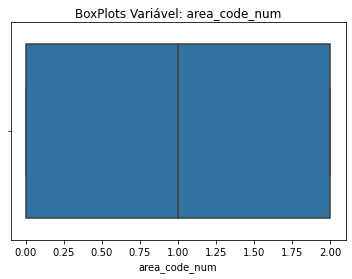

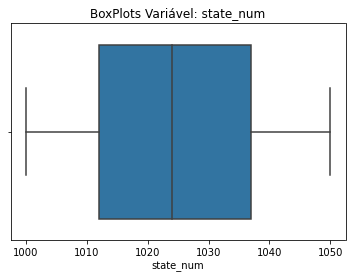

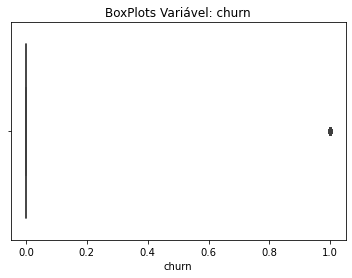

In [22]:
# Removendo os dados categóricos
columnsBox = df_train.select_dtypes(exclude='category').columns

for i in columnsBox:
    #ds_train[i].plot(kind = 'box')
    sns.boxplot(df_train[i])
    plt.title('BoxPlots Variável: ' + i)  
    plt.show()

In [23]:
#Verificando a correlação entre as variáveis
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.024735,0.002918,-0.006303,0.000816,0.016541
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,0.008745,0.956927,-0.013083,-0.003014,-0.089728
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.049396,-0.001684,-0.025474,-0.009719,0.205151
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.003755,-0.011086,-0.009313,-0.026499,0.018459
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.049398,-0.001686,-0.025478,-0.009718,0.205151
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.019100,0.021545,0.005931,0.010167,0.092796
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.006114,-0.006444,-0.018454,0.015524,0.009233
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.019106,0.021559,0.005954,0.010173,0.092786
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,-0.028905,0.006079,-0.017652,-0.001571,0.035493
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.012451,0.015553,-0.001223,0.002445,0.006141


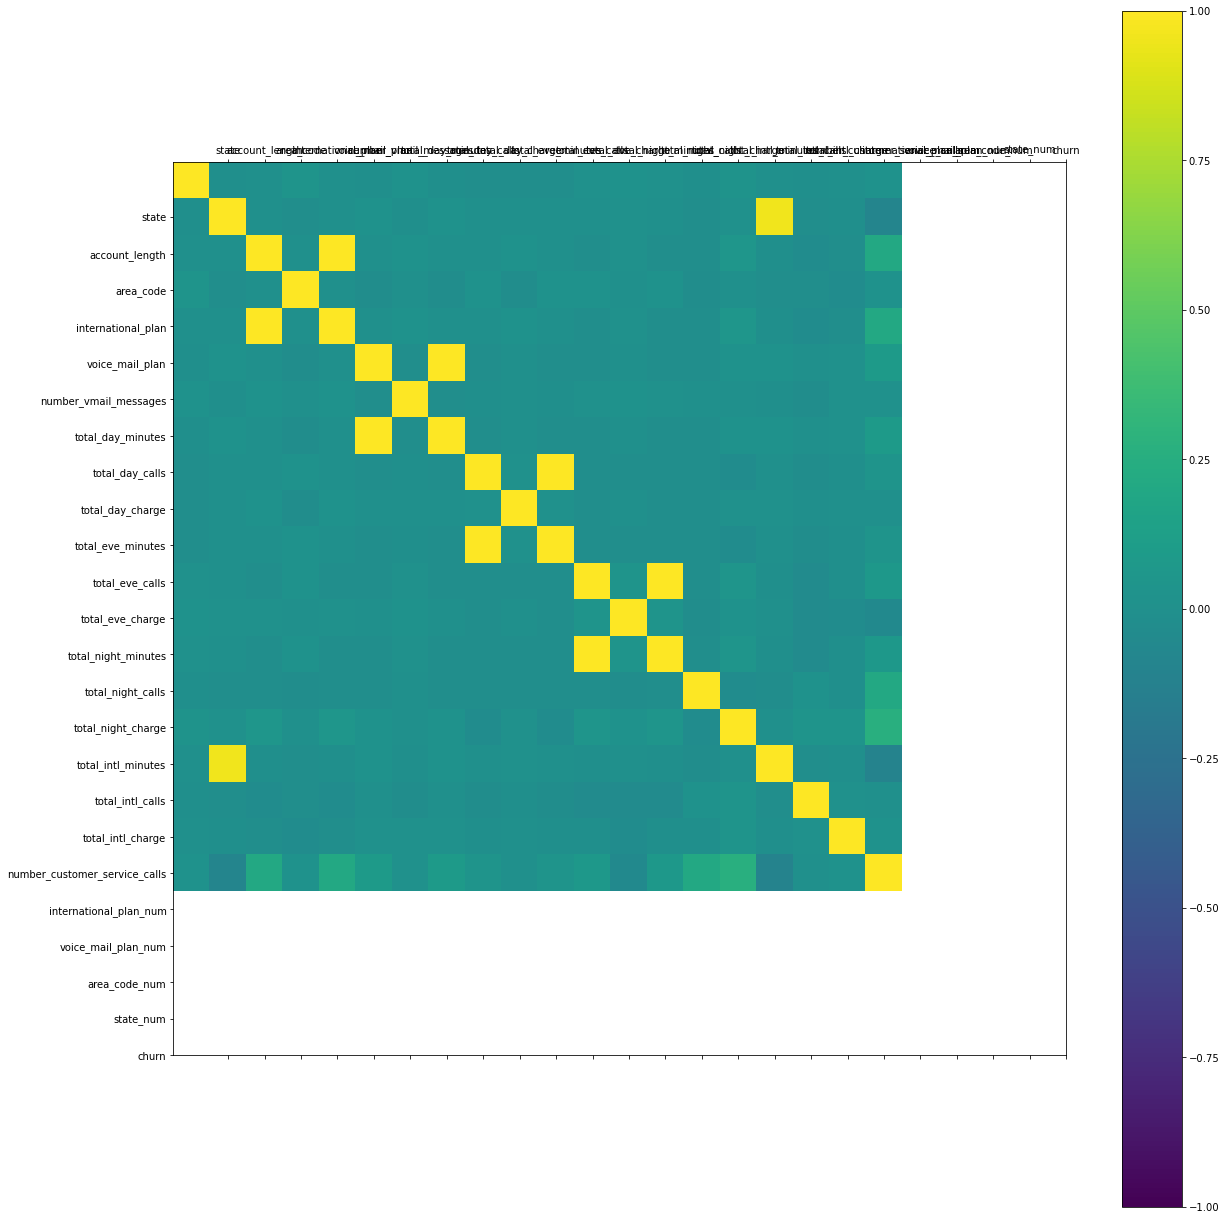

In [24]:
#Verificando a correlação entre as variáveis
corr = df_train.corr()
fig = plt.figure(figsize=(20,22))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin = -1, vmax = 1)
fig.colorbar(cax)

#definindo tamanho do array
ticks = np.arange(1, 25, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_train.columns )
ax.set_yticklabels(df_train.columns)
plt.show()

In [25]:
#Verificando a correlação da var TARGET (churn)
df_train.corr().churn

account_length                   0.016541
number_vmail_messages           -0.089728
total_day_minutes                0.205151
total_day_calls                  0.018459
total_day_charge                 0.205151
total_eve_minutes                0.092796
total_eve_calls                  0.009233
total_eve_charge                 0.092786
total_night_minutes              0.035493
total_night_calls                0.006141
total_night_charge               0.035496
total_intl_minutes               0.068239
total_intl_calls                -0.052844
total_intl_charge                0.068259
number_customer_service_calls    0.208750
international_plan_num           0.259852
voice_mail_plan_num             -0.102148
area_code_num                    0.007297
state_num                        0.021924
churn                            1.000000
Name: churn, dtype: float64

In [26]:
#Exibindo a correlção menor 0.01
df_train.corr().churn <= 0.001

account_length                   False
number_vmail_messages            True 
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 True 
total_intl_charge                False
number_customer_service_calls    False
international_plan_num           False
voice_mail_plan_num              True 
area_code_num                    False
state_num                        False
churn                            False
Name: churn, dtype: bool

É possível verificar que as variáveis que apresentam "True": {number_vmail_messages}, {total_eve_calls}, {total_intl_calls}, {voice_mail_plan_num} e {area_code_num} - são as variáveis que menos possuem correlação com a variável TARGET (churn), podendo ser candidatas a serem removidas durante o treinamento do modelo.

## D - Feature Selection (Escolha das variáveis mais relevantes para serem utilizadas no modelo)

Será utilizado a técnica RFE (Recursive Feature Elimination) que é baseado na idéia de construir repetidamente um modelo e escolher a que obtiver melhor ou pior desempenho até que os recursos sejam esgotados.

O objetivo do RFE é selecionar recursos considerando recursivamente os conjuntos de recursos cada vez menor.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [27]:
# Remove as colunas Categóricas.
df_train_FeatureSelect = df_train.drop(['voice_mail_plan','area_code','state','international_plan'], axis=1)

# Transforma o Dataframe do Pandas em um Array Numpy (Array é um formato esperado para utilização do RFE)
df_train_array = df_train_FeatureSelect.values

# Separando os dados em inputs(features) e outputs (target)
features_x = df_train_array[:,:-1] # selecionando todas as colunas exceto a ultima (que é a TARGET)
target_y = df_train_array[:,19:] # selecionando somente a ultima coluna Target

# Criando o modelo utilizando Regressão Logistica
LogReg = LogisticRegression()

# Aplicando o modelo RFE
rfe = RFECV(LogReg, cv=4, scoring='accuracy')
fit = rfe.fit(features_x, target_y)


# Print dos resultados
print("Variáveis Preditoras:", df_train_FeatureSelect.columns[:-1],"\n")
print("Variáveis Selecionadas: %s" % fit.support_,"\n")
print("Ranking dos Atributos: %s" % fit.ranking_,"\n")
print("Número de Melhores Atributos: %d" % fit.n_features_)


del features_x
del target_y
del df_train_array

Variáveis Preditoras: Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'international_plan_num',
       'voice_mail_plan_num', 'area_code_num', 'state_num'],
      dtype='object') 

Variáveis Selecionadas: [False  True  True  True  True  True False False  True False False  True
  True  True  True  True  True  True  True] 

Ranking dos Atributos: [3 1 1 1 1 1 6 4 1 2 5 1 1 1 1 1 1 1 1] 

Número de Melhores Atributos: 14


É possível visualizar que o melhor resultado obtido através do Cross Validation considerando a Acurácia é quando utilizamos 5 variáveis, porém por escolha pessoal, podemos realizar o treinamento utilizando quantas e quais variáveis for desejado.



In [28]:
# Selecionando somente as colunas escolhidas pelo algoritmo RFECV como mais relevantes e melhor acurácia para treinamento.
def SelectVariablesRFECV(dataset):
    datasetReturn = dataset[['number_vmail_messages', 'total_day_minutes','total_day_calls', 'total_day_charge',
                             'total_eve_minutes','total_night_minutes','total_intl_minutes','total_intl_calls',
                             'total_intl_charge','number_customer_service_calls', 'international_plan_num',
                             'voice_mail_plan_num', 'area_code_num', 'state_num', 'churn']]
    
    return datasetReturn

In [29]:
#Instaciando dataset
df_train_Selected = SelectVariablesRFECV(df_train)

Resumo das variáveis escolhidas pelo RFECV como mais relevantes para utilização

In [30]:
#Sumário Estatístico
df_train_Selected.describe()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,200.872037,10.237294,4.479448,2.764581,1.562856,0.096910,0.276628,0.755476,1024.269127,0.144914
std,13.688365,54.467389,20.069084,9.259435,50.713844,50.573847,2.791840,2.461214,0.753773,1.315491,0.295879,0.447398,0.830054,14.736558,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,167.000000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,1012.000000,0.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,201.200000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,1.000000,1024.000000,0.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,235.300000,12.100000,6.000000,3.270000,2.000000,0.000000,1.000000,2.000000,1037.000000,0.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,395.000000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,2.000000,1050.000000,1.000000


In [31]:
#Visualizando dataset
df_train_Selected.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,25,265.1,110,45.07,197.4,244.7,10.0,3,2.70,1,0,1,0,1000,0
1,26,161.6,123,27.47,195.5,254.4,13.7,3,3.70,1,0,1,0,1001,0
2,0,243.4,114,41.38,121.2,162.6,12.2,5,3.29,0,0,0,0,1002,0
3,0,299.4,71,50.90,61.9,196.9,6.6,7,1.78,2,1,0,1,1001,0
4,0,166.7,113,28.34,148.3,186.9,10.1,3,2.73,3,1,0,0,1003,0


In [32]:
#Tamanho do Dataset
df_train_Selected.shape

(3333, 15)

É possível verificar que as variáveis escolhidas durante o Feature Selection possuem muitos outliers (os quais não serão removidos da análise) e portanto, aplicar a técnica de Normalização dos dados pode não ser a melhor. A partir dessa observação, a decisão escolhida será aplicar a técnica de Padronização que irá ajustar os dados para média = 0 e desvio padrão = 1.

## E - Padronização das Variaveis

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Assim como o algoritmo RFECV utilizado na etapa de feature Selection, o algoritmo StandardScaler esperar que os dados sejam em formato de Array.


In [33]:
def standardizationData(dataset):
    # Transforma o Dataframe do Pandas em um Array Numpy (Array é um formato esperado para utilização do StandardScale)
    df_train_array = dataset.values

    # Separando os dados em inputs(features) e outputs (target)
    features_x = df_train_array[:,:-1] # selecionando todas as colunas exceto a ultima (que é a TARGET)
    target_y = df_train_array[:,14:] # selecionando somente a ultima coluna Target

    # Gerando os novos dados Padronizados
    StScaler = StandardScaler(with_mean=False, with_std=False).fit(features_x)
    df_train_return = StScaler.transform(features_x) # Transformamos somente as variáveis preditoras.

    # Nomeia as colunas
    df_features = pd.DataFrame(df_train_return, columns= ['number_vmail_messages', 'total_day_minutes','total_day_calls',
                                                          'total_day_charge','total_eve_minutes','total_night_minutes',
                                                          'total_intl_minutes','total_intl_calls','total_intl_charge',
                                                          'number_customer_service_calls', 'international_plan_num',
                                                          'voice_mail_plan_num', 'area_code_num', 'state_num'])
    
    df_target = pd.DataFrame(target_y, columns=['churn'])

    # Junta os 2 dataframes por coluna
    df_train_return = pd.concat([df_features,df_target],axis=1) 

    del (df_train_array)
    del (features_x)
    del (target_y)
    del (StScaler)
    del (df_features)
    del (df_target)

    return df_train_return

In [34]:
#instanciando a standartization
df_train_standard = standardizationData(df_train_Selected)
df_train_standard.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,25.0,265.1,110.0,45.07,197.4,244.7,10.0,3.0,2.70,1.0,0.0,1.0,0.0,1000.0,0.0
1,26.0,161.6,123.0,27.47,195.5,254.4,13.7,3.0,3.70,1.0,0.0,1.0,0.0,1001.0,0.0
2,0.0,243.4,114.0,41.38,121.2,162.6,12.2,5.0,3.29,0.0,0.0,0.0,0.0,1002.0,0.0
3,0.0,299.4,71.0,50.90,61.9,196.9,6.6,7.0,1.78,2.0,1.0,0.0,1.0,1001.0,0.0
4,0.0,166.7,113.0,28.34,148.3,186.9,10.1,3.0,2.73,3.0,1.0,0.0,0.0,1003.0,0.0


## F - Balanceamento dos dados - Caso exista mais dados de uma classificação

Como verificado no "Passo 1: C - Realizar a analise exploratoria das váriaveis para compreender os dados estão distribuidos", os dados estão desbalanceados e para que o modelo não fique tendencioso, utilizaremos a técnica SMOTTE.

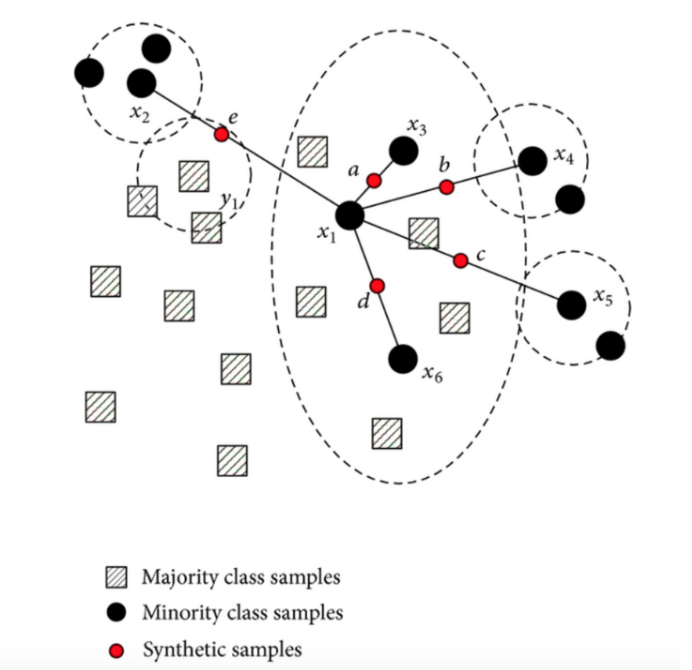

In [35]:
from IPython.display import Image
Image("DATA/image_07.png")

In [36]:
def BalancingData(dataset, var_target):
    #Fazer split da váriavel target e as preditoras
    x_train = dataset.drop([var_target], axis = 1)
    y_train = dataset[var_target]
    
    #modelo
    smt = SMOTE()
    
    #Separar os dados em features e target
    features_train, target_train = smt.fit_resample(x_train, y_train)
    
    #crio novo data frame
    target_train_df = pd.DataFrame(target_train)
    
    #atribuindo nome da coluna
    target_train_df.columns = ['churn']
    
    features_train_df = pd.DataFrame(features_train)
    features_train_df.columns = x_train.columns
    
    return pd.concat([features_train_df, target_train_df], axis = 1)

In [37]:
#modelo

df_train_final = BalancingData(df_train_standard, 'churn')

#contabilizar yes/no
count_No = len(df_train_final[df_train_final['churn']==0])
count_Yes = len(df_train_final[df_train_final['churn']==1])

#Printar na tela
print ("Percentual de Clientes que Cancelou após do Balanceamento: ", round((count_Yes / (count_Yes+count_No))*100,2))
print ("Percentual de Clientes que Não Cancelou após do Balanceamento: ", round((count_No / (count_Yes+count_No))*100,2))

Percentual de Clientes que Cancelou após do Balanceamento:  50.0
Percentual de Clientes que Não Cancelou após do Balanceamento:  50.0


Podemos verificar que os dados estão balanceados!

# Passo 2
Análise e interpretação dos resultados

## A - SPLIT do dataset treino/teste com divisão 70% por 30%

In [38]:
#visualizando dataset
df_train_final.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,25.0,265.1,110.0,45.07,197.4,244.7,10.0,3.0,2.70,1.0,0.0,1.0,0.0,1000.0,0.0
1,26.0,161.6,123.0,27.47,195.5,254.4,13.7,3.0,3.70,1.0,0.0,1.0,0.0,1001.0,0.0
2,0.0,243.4,114.0,41.38,121.2,162.6,12.2,5.0,3.29,0.0,0.0,0.0,0.0,1002.0,0.0
3,0.0,299.4,71.0,50.90,61.9,196.9,6.6,7.0,1.78,2.0,1.0,0.0,1.0,1001.0,0.0
4,0.0,166.7,113.0,28.34,148.3,186.9,10.1,3.0,2.73,3.0,1.0,0.0,0.0,1003.0,0.0


In [39]:
# Transforma o Dataframe do Pandas em um Array Numpy
df_train_array = df_train_final.values

#Separando os dados em inputs(features) e outputs (target)
features_x = df_train_array[:, :-1] #selecionando todas as colunas menos a target
target_y = df_train_array[:, 14:]#selecionando somente a coluna Target

#Definindo o tamanho da amostra
data_size_test = 0.30

#Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(features_x, target_y, test_size = data_size_test )

del (features_x)
del (target_y)
del (data_size_test)
del (df_train_array)

## B - Escolhado dos Modelos a ser utilizado

O modelo que utilizaremos será o de Regressão Logistíca

In [40]:
#importando das bibliotecas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
# Criação dos modelos
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [42]:
# Avaliação dos modelos
results = []
names = []

In [43]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [44]:
for name, model in models:
        kfold = KFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_treino, Y_treino, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
 

LR: 0.733835 (0.024932)
KNN: 0.818797 (0.014312)
CART: 0.927068 (0.009068)
NB: 0.800501 (0.031327)
SVM: 0.637093 (0.024831)


Podemos observar que os modelos com melhor resultado foram: KNN, CART e NB.

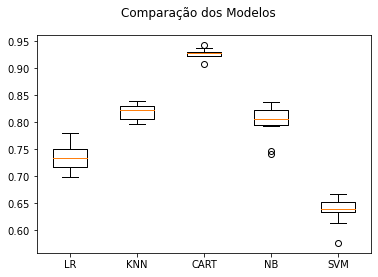

In [45]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## C - Cross-Validation
Aplicando Cross-Validation para encontrar a média das previsões dos modelos com dados de teste.

### CART -  DecisionTreeClassifier

In [46]:
# Construindo o Classificador Baseado em Entropia
modelo_v1 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   criterion = 'entropy', 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [47]:
# Apresentando os dados ao Classificador
modelo_v1.fit(X_treino, Y_treino)
modelo_v1.score(X_teste, Y_teste)

0.9403508771929825

In [48]:
# Construindo o Classificador Baseado no índice Gini
modelo_v2 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [49]:
# Apresentando os dados ao Classificador
modelo_v2.fit(X_treino, Y_treino)
modelo_v2.score(X_teste, Y_teste)

0.9345029239766082

In [50]:
#criando função
def CrossValidation(model, x_test, y_test, metric_scoring, kfold):
    CV_result = cross_val_score(model, X= x_test, y= y_test, cv=kfold, scoring=metric_scoring)
    
    return print("Cross-Validation mean:", CV_result.mean())
    

In [51]:
#modelo_v1
kfold = KFold(n_splits = 10, shuffle=True)

CrossValidation(modelo_v1, X_teste, Y_teste, 'accuracy', kfold)

Cross-Validation mean: 0.9280701754385966


In [52]:
#modelo_V2
kfold = KFold(n_splits = 10, shuffle=True)

CrossValidation(modelo_v2, X_teste, Y_teste, 'accuracy', kfold)

Cross-Validation mean: 0.9280701754385964


### KNN - KNeighborsClassifier

In [53]:
# Range de valores de k que iremos testar
k = range(1, 21, 2)

In [54]:
np.random.seed(7) # definindo uma semente global

# Tuning do KNN
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_treino, Y_treino)
print("Melhor: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.881454 usando {'metric': 'manhattan', 'n_neighbors': 1}
0.881203 (0.016783): {'metric': 'euclidean', 'n_neighbors': 1}
0.833083 (0.020643): {'metric': 'euclidean', 'n_neighbors': 3}
0.818797 (0.014312): {'metric': 'euclidean', 'n_neighbors': 5}
0.798997 (0.014605): {'metric': 'euclidean', 'n_neighbors': 7}
0.792231 (0.021573): {'metric': 'euclidean', 'n_neighbors': 9}
0.787719 (0.016283): {'metric': 'euclidean', 'n_neighbors': 11}
0.788221 (0.014922): {'metric': 'euclidean', 'n_neighbors': 13}
0.777945 (0.019773): {'metric': 'euclidean', 'n_neighbors': 15}
0.768170 (0.025318): {'metric': 'euclidean', 'n_neighbors': 17}
0.764912 (0.020631): {'metric': 'euclidean', 'n_neighbors': 19}
0.881454 (0.013312): {'metric': 'manhattan', 'n_neighbors': 1}
0.843358 (0.021942): {'metric': 'manhattan', 'n_neighbors': 3}
0.831830 (0.023119): {'metric': 'manhattan', 'n_neighbors': 5}
0.812281 (0.023335): {'metric': 'manhattan', 'n_neighbors': 7}
0.810025 (0.019244): {'metric': 'manhattan', 'n

In [55]:
#Criando a versão final do modelo com o maior valor de k
modelo_v3 = KNeighborsClassifier(n_neighbors = 1)

In [56]:
# Treinamento do modelo
modelo_v3.fit(X_treino, Y_treino)
modelo_v3.score(X_teste, Y_teste)

0.8853801169590644

## D - Confusion Matriz (originais VS previstos)

Usado para descrever a performance da classificação de um modelo em um conjunto de dados de teste cujo os valores reais são conhecidos.

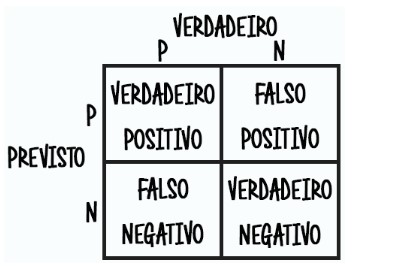

In [57]:
from IPython.display import Image
Image("DATA/matrixconf.jpg")

### CART  

In [58]:
# Prevendo o resultado do modelo V1 informando as variáveis preditoras de teste, para depois realizar a classificação e taxa de acerto obtido pelo modelo.
target_predicted_v1 = modelo_v1.predict(X_teste)
target_proba_v1 = modelo_v1.predict_proba(X_teste)

print("Accuracy (TP/Total):",metrics.accuracy_score(Y_teste, target_predicted_v1))
print("Precision (TP/TP+FP):",metrics.precision_score(Y_teste, target_predicted_v1))
print("Recall (TP/TP+FN):",metrics.recall_score(Y_teste, target_predicted_v1))
print("Classification Report:")
print(metrics.classification_report(Y_teste, target_predicted_v1))
print(target_proba_v1)

Accuracy (TP/Total): 0.9403508771929825
Precision (TP/TP+FP): 0.9387514723203769
Recall (TP/TP+FN): 0.9409681227863046
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       863
         1.0       0.94      0.94      0.94       847

    accuracy                           0.94      1710
   macro avg       0.94      0.94      0.94      1710
weighted avg       0.94      0.94      0.94      1710

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


Text(0.5, 257.44, 'Predicted label')

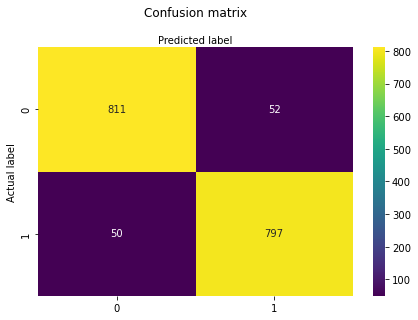

In [59]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_teste, target_predicted_v1)

class_names = [1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### KNN

In [60]:
# Prevendo o resultado do modelo V3 informando as variáveis preditoras de teste, para depois realizar a classificação e taxa de acerto obtido pelo modelo.
target_predicted_v3 = modelo_v3.predict(X_teste)
target_proba_v3 = modelo_v3.predict_proba(X_teste)

print("Accuracy (TP/Total):",metrics.accuracy_score(Y_teste, target_predicted_v3))
print("Precision (TP/TP+FP):",metrics.precision_score(Y_teste, target_predicted_v3))
print("Recall (TP/TP+FN):",metrics.recall_score(Y_teste, target_predicted_v3))
print("Classification Report:")
print(metrics.classification_report(Y_teste, target_predicted_v3))
print(target_proba_v3)

Accuracy (TP/Total): 0.8853801169590644
Precision (TP/TP+FP): 0.8206896551724138
Recall (TP/TP+FN): 0.9834710743801653
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87       863
         1.0       0.82      0.98      0.89       847

    accuracy                           0.89      1710
   macro avg       0.90      0.89      0.88      1710
weighted avg       0.90      0.89      0.88      1710

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


Text(0.5, 257.44, 'Predicted label')

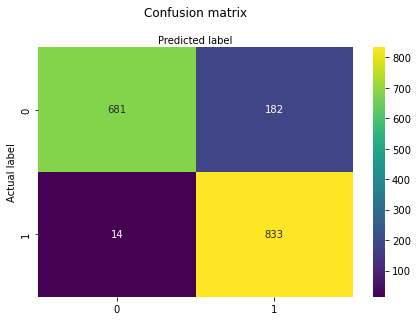

In [61]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_teste, target_predicted_v3)

class_names = [1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## E - Otimização do modelo (ajuste dos parametros)

In [62]:
# Construindo o Classificador Baseado em Log_loss
modelo_final = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   criterion = 'log_loss', 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [63]:
# Apresentando os dados ao Classificador
modelo_final.fit(X_treino, Y_treino)
modelo_final.score(X_teste, Y_teste)

0.9485380116959065

In [64]:
#modelo_Final
kfold = KFold(n_splits = 10, shuffle=True)

CrossValidation(modelo_final, X_teste, Y_teste, 'accuracy', kfold)

Cross-Validation mean: 0.9380116959064327


In [65]:
# Prevendo o resultado do modelo final informando as variáveis preditoras de teste, para depois realizar a classificação e taxa de acerto obtido pelo modelo.
target_predicted_final = modelo_v1.predict(X_teste)
target_proba_final = modelo_v1.predict_proba(X_teste)

print("Accuracy (TP/Total):",metrics.accuracy_score(Y_teste, target_predicted_final))
print("Precision (TP/TP+FP):",metrics.precision_score(Y_teste, target_predicted_final))
print("Recall (TP/TP+FN):",metrics.recall_score(Y_teste, target_predicted_final))
print("Classification Report:")
print(metrics.classification_report(Y_teste, target_predicted_final))
print(target_proba_final)

Accuracy (TP/Total): 0.9403508771929825
Precision (TP/TP+FP): 0.9387514723203769
Recall (TP/TP+FN): 0.9409681227863046
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       863
         1.0       0.94      0.94      0.94       847

    accuracy                           0.94      1710
   macro avg       0.94      0.94      0.94      1710
weighted avg       0.94      0.94      0.94      1710

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


# Passo 3
Tomada de descisão e implementação

## A - Tratamento dos dados teste

Função que será utilizada para transforma algumas variáveis string em Numéricas através de um mapeamento de dict.

Remover a variável Target, Selecionar as variáveis obtidas durante a Feature Selection e Realizar a padronização de dados.



In [66]:
# Carregando o dataset de treino utilizando Pandas
ds_test = pd.read_csv("projeto4_telecom_teste.csv", sep = ",")
ds_test.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [67]:
# Remove a coluna 
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [68]:
# Verificando se existe valores missing
df_test.isnull().values.any()

False

In [69]:
# Função que será utilizada para transforma algumas variáveis string em Numéricas através de um mapeamento de dict.
df_test = transformColumns(df_test)
df_test.head() 

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0,2,1024,0
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0,2,1012,0
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0,1,1,1001,0
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0,0,1041,0
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0,0,0,1021,0


In [70]:
# Aplica a seleção de Variáveis 
df_test_Select = SelectVariablesRFECV(df_test)


In [71]:
# Aplica a padronização dos dados e remover a coluna Churn
df_test_standard = standardizationData(df_test_Select)
df_test_standard.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,0.0,70.9,123.0,12.05,211.9,236.0,10.6,3.0,2.86,3.0,0.0,0.0,2.0,1024.0,0.0
1,0.0,223.6,86.0,38.01,244.8,94.2,9.5,7.0,2.57,0.0,0.0,0.0,2.0,1012.0,0.0
2,29.0,294.7,95.0,50.10,237.3,300.3,13.7,6.0,3.70,1.0,0.0,1.0,1.0,1001.0,0.0
3,0.0,216.8,123.0,36.86,126.4,220.6,15.7,2.0,4.24,1.0,0.0,0.0,0.0,1041.0,0.0
4,0.0,197.4,78.0,33.56,124.0,204.5,7.7,4.0,2.08,2.0,0.0,0.0,0.0,1021.0,0.0


In [72]:
#Resultado real 
df_test_standard.groupby('churn').size()

churn
0.0    1443
1.0    224 
dtype: int64

In [73]:
#Deleta a variável Target
df_test_standard1 = df_test_standard.drop('churn', axis=1)#remove coluna Churn

df_test_standard1.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num
0,0.0,70.9,123.0,12.05,211.9,236.0,10.6,3.0,2.86,3.0,0.0,0.0,2.0,1024.0
1,0.0,223.6,86.0,38.01,244.8,94.2,9.5,7.0,2.57,0.0,0.0,0.0,2.0,1012.0
2,29.0,294.7,95.0,50.10,237.3,300.3,13.7,6.0,3.70,1.0,0.0,1.0,1.0,1001.0
3,0.0,216.8,123.0,36.86,126.4,220.6,15.7,2.0,4.24,1.0,0.0,0.0,0.0,1041.0
4,0.0,197.4,78.0,33.56,124.0,204.5,7.7,4.0,2.08,2.0,0.0,0.0,0.0,1021.0


In [74]:
# Transforma as variáveis target em array
features_x = df_test_standard1.values
features_x

array([[0.000e+00, 7.090e+01, 1.230e+02, ..., 0.000e+00, 2.000e+00,
        1.024e+03],
       [0.000e+00, 2.236e+02, 8.600e+01, ..., 0.000e+00, 2.000e+00,
        1.012e+03],
       [2.900e+01, 2.947e+02, 9.500e+01, ..., 1.000e+00, 1.000e+00,
        1.001e+03],
       ...,
       [0.000e+00, 1.406e+02, 8.900e+01, ..., 0.000e+00, 0.000e+00,
        1.043e+03],
       [0.000e+00, 1.888e+02, 6.700e+01, ..., 0.000e+00, 2.000e+00,
        1.043e+03],
       [3.400e+01, 1.294e+02, 1.020e+02, ..., 1.000e+00, 0.000e+00,
        1.015e+03]])

## B - Predict 

Previsão dos modelos 

### Modelo Final

Modelo de CART

In [75]:
predicted_value = modelo_final.predict(features_x)
predicted_prob = modelo_final.predict_log_proba(features_x)

predict_value_df = pd.DataFrame(predicted_value, columns=['Ação Prevista'])
predict_prob_df = pd.DataFrame(predicted_prob, columns=['Prob. Não Cancelamento','Prob. Cancelamento'])

In [76]:
#Modelo Previsto
result_final = pd.concat([df_test_standard, predict_value_df, predict_prob_df],axis=1)
result_final.head(10)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn,Ação Prevista,Prob. Não Cancelamento,Prob. Cancelamento
0,0.0,70.9,123.0,12.05,211.9,236.0,10.6,3.0,2.86,3.0,0.0,0.0,2.0,1024.0,0.0,0.0,0.0,-inf
1,0.0,223.6,86.0,38.01,244.8,94.2,9.5,7.0,2.57,0.0,0.0,0.0,2.0,1012.0,0.0,0.0,0.0,-inf
2,29.0,294.7,95.0,50.10,237.3,300.3,13.7,6.0,3.70,1.0,0.0,1.0,1.0,1001.0,0.0,0.0,0.0,-inf
3,0.0,216.8,123.0,36.86,126.4,220.6,15.7,2.0,4.24,1.0,0.0,0.0,0.0,1041.0,0.0,0.0,0.0,-inf
4,0.0,197.4,78.0,33.56,124.0,204.5,7.7,4.0,2.08,2.0,0.0,0.0,0.0,1021.0,0.0,0.0,0.0,-inf
5,0.0,226.5,85.0,38.51,141.6,223.0,6.9,5.0,1.86,1.0,0.0,0.0,0.0,1011.0,0.0,0.0,0.0,-inf
6,32.0,218.9,124.0,37.21,214.3,260.3,12.9,3.0,3.48,1.0,0.0,1.0,0.0,1050.0,0.0,0.0,0.0,-inf
7,0.0,157.5,97.0,26.78,224.5,310.8,11.1,6.0,3.00,0.0,0.0,0.0,1.0,1007.0,0.0,0.0,0.0,-inf
8,0.0,89.1,117.0,15.15,126.8,190.5,9.9,4.0,2.67,2.0,0.0,0.0,2.0,1006.0,0.0,0.0,0.0,-inf
9,43.0,177.8,100.0,30.23,147.3,194.2,11.9,1.0,3.21,0.0,0.0,1.0,0.0,1017.0,0.0,0.0,0.0,-inf


In [77]:
#Previsão
result_final.groupby('Ação Prevista').size()


Ação Prevista
0.0    1420
1.0    247 
dtype: int64

Do dataset utilizado para realizar previsões é possível notar que das 1429 Operadoras Telecom, 238 irão cancelar.

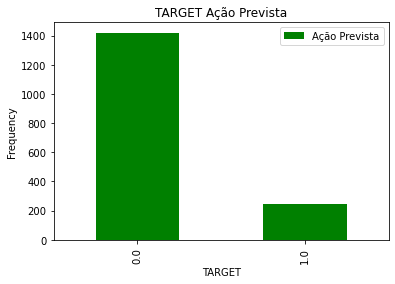

In [78]:
#Distribuição da classe TARGET
pd.value_counts(result_final['Ação Prevista']).plot(color = 'green', kind = 'bar')
plt.title('TARGET Ação Prevista')
plt.xlabel('TARGET')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('f.jpg')



In [79]:
#Salvando o dataset result_final
result_final.to_csv('df_ResultFinal')

In [80]:
df = pd.read_csv('df_ResultFinal')

In [81]:
df.head()

,Unnamed: 0,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn,Ação Prevista,Prob. Não Cancelamento,Prob. Cancelamento
0,0,0.0,70.9,123.0,12.05,211.9,236.0,10.6,3.0,2.86,3.0,0.0,0.0,2.0,1024.0,0.0,0.0,0.0,-inf
1,1,0.0,223.6,86.0,38.01,244.8,94.2,9.5,7.0,2.57,0.0,0.0,0.0,2.0,1012.0,0.0,0.0,0.0,-inf
2,2,29.0,294.7,95.0,50.10,237.3,300.3,13.7,6.0,3.70,1.0,0.0,1.0,1.0,1001.0,0.0,0.0,0.0,-inf
3,3,0.0,216.8,123.0,36.86,126.4,220.6,15.7,2.0,4.24,1.0,0.0,0.0,0.0,1041.0,0.0,0.0,0.0,-inf
4,4,0.0,197.4,78.0,33.56,124.0,204.5,7.7,4.0,2.08,2.0,0.0,0.0,0.0,1021.0,0.0,0.0,0.0,-inf


In [82]:
#Previsão
df.groupby('Ação Prevista').size()

Ação Prevista
0.0    1420
1.0    247 
dtype: int64

In [83]:
#dados reais do dataset
df.groupby('churn').size()

churn
0.0    1443
1.0    224 
dtype: int64

### Salvando modelo treinado com Pickle

In [84]:
#Pacote
import pickle

In [85]:
#Salvar modelo treinado
saved_model = pickle.dumps(modelo_final)

#carregando modelo
cart_from_pickle = pickle.loads(saved_model)

In [86]:
#Usar o modelo carregado para fazer previsões
cart_from_pickle.predict(X_treino)

array([1., 1., 0., ..., 1., 1., 0.])